# Credit Card Costumer
Proyect 1 - Datascientist 


In [125]:
#### import the libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [126]:
#### We load the data and validate that all are loaded correctly
df = pd.read_excel('BankChurners.xls',sheet_name='BankChurners')
### The last two columns are eliminated since they are not part of the data set given the recommendation of Kaggle
df=df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
df.head()
print(df)
df.describe()
df.shape

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

(10127, 21)

In [127]:
## We remove identification columns and avg_open given that their correlation with limit of credit is close to 1
df1=df.drop(columns = ['CLIENTNUM','Avg_Open_To_Buy'])
df1.head()
df1.shape

(10127, 19)

# We convert categorical variables

In [128]:
df1 = pd.get_dummies(df1, columns=['Attrition_Flag'])
df1.head(5)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1335.0,1144,42,1625.0,0.061,0,1
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1541.0,1291,33,3714.0,0.105,0,1
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,2594.0,1887,20,2333.0,0.000,0,1
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1405.0,1171,20,2333.0,0.760,0,1
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,2175.0,816,28,2.5,0.000,0,1


In [129]:
df1 = pd.get_dummies(df1, columns=['Gender'])
df1.head(5)

,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Gender_F,Gender_M
0,45,3,High School,Married,$60K - $80K,Blue,39,5,1,3,...,777,1335.0,1144,42,1625.0,0.061,0,1,0,1
1,49,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,...,864,1541.0,1291,33,3714.0,0.105,0,1,1,0
2,51,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,...,0,2594.0,1887,20,2333.0,0.000,0,1,0,1
3,40,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,...,2517,1405.0,1171,20,2333.0,0.760,0,1,1,0
4,40,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,...,0,2175.0,816,28,2.5,0.000,0,1,0,1


In [130]:
df1 = pd.get_dummies(df1, columns=['Education_Level'])
df1.head(5)

,Customer_Age,Dependent_count,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Attrition_Flag_Existing Customer,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown
0,45,3,Married,$60K - $80K,Blue,39,5,1,3,12691.0,...,1,0,1,0,0,0,1,0,0,0
1,49,5,Single,Less than $40K,Blue,44,6,1,2,8256.0,...,1,1,0,0,0,1,0,0,0,0
2,51,3,Married,$80K - $120K,Blue,36,4,1,0,3418.0,...,1,0,1,0,0,1,0,0,0,0
3,40,4,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,...,1,1,0,0,0,0,1,0,0,0
4,40,3,Married,$60K - $80K,Blue,21,5,1,0,4716.0,...,1,0,1,0,0,0,0,0,1,0


In [131]:
df1 = pd.get_dummies(df1, columns=['Marital_Status'])
df1.head(5)

,Customer_Age,Dependent_count,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,45,3,$60K - $80K,Blue,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,0,1,0,0
1,49,5,Less than $40K,Blue,44,6,1,2,8256.0,864,...,0,1,0,0,0,0,0,0,1,0
2,51,3,$80K - $120K,Blue,36,4,1,0,3418.0,0,...,0,1,0,0,0,0,0,1,0,0
3,40,4,Less than $40K,Blue,34,3,4,1,3313.0,2517,...,0,0,1,0,0,0,0,0,0,1
4,40,3,$60K - $80K,Blue,21,5,1,0,4716.0,0,...,0,0,0,0,1,0,0,1,0,0


In [132]:
df1 = pd.get_dummies(df1, columns=['Card_Category'])
df1.head(5)

,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,$60K - $80K,39,5,1,3,12691.0,777,1335.0,...,0,0,0,1,0,0,1,0,0,0
1,49,5,Less than $40K,44,6,1,2,8256.0,864,1541.0,...,0,0,0,0,1,0,1,0,0,0
2,51,3,$80K - $120K,36,4,1,0,3418.0,0,2594.0,...,0,0,0,1,0,0,1,0,0,0
3,40,4,Less than $40K,34,3,4,1,3313.0,2517,1405.0,...,0,0,0,0,0,1,1,0,0,0
4,40,3,$60K - $80K,21,5,1,0,4716.0,0,2175.0,...,1,0,0,1,0,0,1,0,0,0


In [133]:
df1 = pd.get_dummies(df1, columns=['Income_Category'])
df1.head(5)


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,45,3,39,5,1,3,12691.0,777,1335.0,1144,...,1,0,0,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,1541.0,1291,...,1,0,0,0,0,0,0,0,1,0
2,51,3,36,4,1,0,3418.0,0,2594.0,1887,...,1,0,0,0,0,0,0,1,0,0
3,40,4,34,3,4,1,3313.0,2517,1405.0,1171,...,1,0,0,0,0,0,0,0,1,0
4,40,3,21,5,1,0,4716.0,0,2175.0,816,...,1,0,0,0,0,0,1,0,0,0


In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      10127 non-null  int64  
 1   Dependent_count                   10127 non-null  int64  
 2   Months_on_book                    10127 non-null  int64  
 3   Total_Relationship_Count          10127 non-null  int64  
 4   Months_Inactive_12_mon            10127 non-null  int64  
 5   Contacts_Count_12_mon             10127 non-null  int64  
 6   Credit_Limit                      10127 non-null  float64
 7   Total_Revolving_Bal               10127 non-null  int64  
 8   Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 9   Total_Trans_Amt                   10127 non-null  int64  
 10  Total_Trans_Ct                    10127 non-null  int64  
 11  Total_Ct_Chng_Q4_Q1               10127 non-null  float64
 12  Avg_

In [135]:
# define the numeric columns
col_num = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']

# Correlation matrix

In [136]:
#### Matriz de correlacion
corr_df1 = df1.corr(method='pearson')
corr_df1.style.background_gradient(cmap='coolwarm')

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,-0.025051,-0.046446,-0.067097,0.021766,0.007114,0.018203,-0.018203,0.017312,-0.017312,-0.014788,0.025199,-0.000203,0.001199,-0.022081,0.005057,0.005377,-0.042614,0.047364,-0.011248,-0.026694,0.021409,-0.011901,0.006515,-0.019425,0.044332,-0.013804,-0.017869,0.005381,-0.002573,-0.002264
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,-0.046238,0.025046,0.049912,0.017027,-0.037135,0.018991,-0.018991,-0.004563,0.004563,0.003369,-0.003368,0.000671,-0.013127,0.009459,0.002190,0.004922,0.006697,0.014385,-0.040707,0.041743,-0.027671,0.027035,0.003555,0.017322,0.024831,-0.013493,0.028975,0.047611,-0.046785,-0.019205
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,-0.027773,-0.038591,-0.049819,0.010530,-0.007541,0.013687,-0.013687,0.006728,-0.006728,-0.010281,0.024114,0.003531,0.002637,-0.016703,0.001099,-0.003610,-0.027678,0.033194,-0.005065,-0.026145,0.014934,-0.005426,0.001791,-0.014357,0.033532,-0.003204,-0.016635,0.007720,-0.004300,-0.007688
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,0.069629,-0.347229,-0.241891,0.043470,0.067663,-0.150005,0.150005,-0.003157,0.003157,-0.013582,-0.009077,0.005397,-0.001707,0.012050,0.008202,-0.003969,0.009276,0.017001,-0.017329,-0.009376,0.085789,-0.055678,-0.043289,-0.060566,-0.006090,-0.008747,0.005475,0.001185,0.005109,0.000490
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.028788,-0.036982,-0.042787,-0.012792,-0.007503,0.152449,-0.152449,0.011163,-0.011163,0.004038,0.002432,0.005885,-0.005575,-0.006240,0.010127,-0.012378,0.001796,-0.007065,0.008973,-0.005053,0.016565,-0.003283,-0.004013,-0.016034,-0.002661,-0.021437,-0.004616,-0.005910,0.018848,0.011446
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.020555,-0.112774,-0.152213,-0.029030,-0.055471,0.204491,-0.204491,-0.039987,0.039987,-0.008996,-0.001016,0.002660,-0.003927,-0.006878,0.012596,0.000843,-0.008389,0.001598,0.007997,-0.009562,0.000929,-0.000685,0.001797,-0.001059,0.020744,0.002336,0.000167,0.011473,-0.023255,0.002195
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.011528,0.171730,0.075927,0.003730,-0.482965,-0.023873,0.023873,-0.420806,0.420806,0.001929,-0.005195,-0.004844,-0.001432,0.005879,0.012213,-0.006478,0.022578,-0.056713,0.032309,0.025291,-0.515644,0.234331,0.105976,0.441030,0.339211,-0.161605,0.093808,0.333828,-0.395233,0.034186
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,0.040203,0.064370,0.056060,0.043810,0.624022,-0.263053,0.263053,-0.029658,0.029658,-0.011058,-0.018208,-0.000356,0.019276,0.007068,-0.004446,-0.001219,-0.002368,0.039124,-0.037794,-0.001756,-0.022681,0.023974,0.005739,0.012799,0.020264,0.005220,-0.003847,0.022776,-0.015974,-0.020578
Total_Amt_Chng_Q4_Q1,-0.025051,-0.046238,-0.027773,0.069629,-0.028788,0.020555,0.011528,0.040203,1.000000,-0.111633,-0.

In [137]:
df1.info

<bound method DataFrame.info of        Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   


In [138]:
from sklearn import preprocessing
# Scaling with Standardization - Robust Scaler
scaler = preprocessing.RobustScaler()

# DF with the numerical data scaled
df1_escalado_robust = df1.copy()

# Scale to numeric columns
for c in col_num:
    df1_escalado_robust[c] = scaler.fit_transform(df1[[c]])


df1_escalado_robust.head(5)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,-0.090909,0.5,0.333333,0.5,-1.0,1.0,0.956476,-0.350175,5852.035088,-1.065558,...,1,0,0,0,0,0,1,0,0,0
1,0.272727,1.5,0.888889,1.0,-1.0,0.0,0.435477,-0.289123,6755.543860,-1.008702,...,1,0,0,0,0,0,0,0,1,0
2,0.454545,0.5,0.000000,0.0,-1.0,-2.0,-0.132863,-0.895439,11373.964912,-0.778186,...,1,0,0,0,0,0,0,1,0,0
3,-0.545455,1.0,-0.222222,-0.5,2.0,-1.0,-0.145198,0.870877,6159.052632,-1.055115,...,1,0,0,0,0,0,0,0,1,0
4,-0.545455,0.5,-1.666667,0.5,-1.0,-2.0,0.019618,-0.895439,9536.245614,-1.192419,...,1,0,0,0,0,0,1,0,0,0


# We scale the data for computational improvement and run PCA given the volume of variables we have

In [139]:
from sklearn.preprocessing import StandardScaler

df1_escalado_robust = df1.copy()
df1_escalado_robust[:] = StandardScaler().fit_transform(df1_escalado_robust)
cols = list(df1_escalado_robust.columns)
df1_escalado_robust.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,3.463471,-0.959707,...,0.270611,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,4.045338,-0.916433,...,0.270611,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,7.019638,-0.740982,...,0.270611,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,3.661193,-0.951758,...,0.270611,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,5.836132,-1.056263,...,0.270611,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212


In [140]:
#we define the categorical columns
col_cat = ['Attrition_Flag_Existing Customer', 'Gender_F', 'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 
           'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Education_Level_Unknown', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single',
           'Marital_Status_Unknown', 'Card_Category_Blue', 'Card_Category_Gold','Card_Category_Platinum','Card_Category_Silver',
           'Income_Category_$120K','Income_Category_$40K - $60K','Income_Category_$60K - $80K','Income_Category_$80K - $120K',
          'Income_Category_Less than $40K','Income_Category_Unknown']

In [141]:
pca = PCA()
pca.fit(df1_escalado_robust)

PCA()

In [142]:
pca.explained_variance_ratio_

array([9.73860926e-02, 7.30230520e-02, 6.33988299e-02, 4.88070249e-02,
       4.60396035e-02, 4.18524058e-02, 3.67119796e-02, 3.59638724e-02,
       3.39184714e-02, 3.24447875e-02, 3.20347775e-02, 3.13569581e-02,
       3.09952395e-02, 3.03045725e-02, 2.96932053e-02, 2.94505890e-02,
       2.84665284e-02, 2.81375346e-02, 2.79279016e-02, 2.72158694e-02,
       2.64382578e-02, 2.62507256e-02, 2.57037482e-02, 2.49468448e-02,
       2.32629458e-02, 2.05962218e-02, 1.67719937e-02, 1.08925926e-02,
       6.27393227e-03, 5.48187709e-03, 4.51182317e-03, 3.73974154e-03,
       1.92060203e-32, 4.09048775e-33, 1.56946497e-33, 1.32111498e-33,
       6.03518208e-34, 2.65045693e-35])

In [145]:
import plotly.express as px
df_3 = pd.DataFrame({'Número componentes': range(1,39), 'Varianza acumulada': pca.explained_variance_ratio_.cumsum()})
fig = (px.line(df_3, x='Número componentes', y='Varianza acumulada', template='seaborn')).update_traces(mode='lines+markers')
fig.update_layout(height = 450, width = 800, xaxis_title="Número de componentes", yaxis_title="Varianza acumulada",title='Varianza de componentes principales', plot_bgcolor='rgba(0,0,0,0)')
fig.add_vline(x=0.0, line_width=2, line_color="black")
fig.add_hline(y=0.4, line_width=2, line_color="black")
fig.add_hrect(y0=0.8, y1=1.01, line_width=0, fillcolor="yellow", opacity=0.30)
fig.show()


In [146]:
pca_def = PCA(n_components=20)
pca_def.fit(df1_escalado_robust)

PCA(n_components=20)

In [147]:
pca_def.transform(df1_escalado_robust)

array([[ 1.69883299, -1.6430706 , -3.14447608, ...,  0.39825911,
         2.29195851,  1.16084669],
       [-1.54781745, -1.05383806, -1.8477246 , ...,  1.71639912,
         5.24421018,  3.18498613],
       [ 1.48265373, -2.11905503, -3.66177499, ...,  0.82423216,
         5.2672409 ,  2.9323045 ],
       ...,
       [-1.40103518, -2.21957763,  2.41096435, ..., -0.47499888,
         0.33980535, -0.45977777],
       [ 1.07736918, -2.28818855,  1.72717058, ...,  1.30563041,
        -0.84045381,  0.30441566],
       [ 0.44465908, -0.02001425,  4.41878543, ..., -0.88324834,
        -0.41368381, -0.08951115]])

In [148]:
scores_pca_def = pca_def.transform(df1_escalado_robust)

# We run Kmeans model to identify transactional profiles

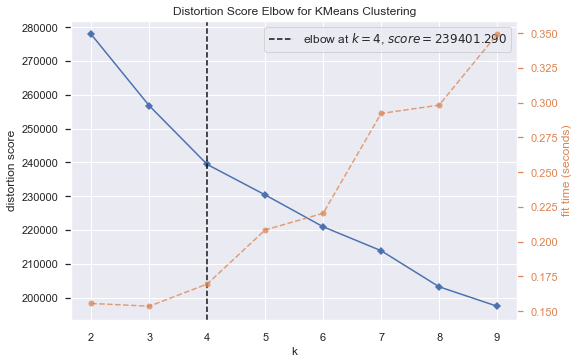

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [149]:
###pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

modelo = KMeans()

grafico = KElbowVisualizer(modelo, k=(2,10), algorithm = 'auto')
grafico.fit(scores_pca_def)
grafico.show()



In [150]:
# Model with optimal parameters
kmeans_opt = KMeans(n_clusters = 4, algorithm = 'auto')
kmeans_opt.fit(df1_escalado_robust)

KMeans(n_clusters=4)

In [151]:
print("wss", kmeans_opt.inertia_)
silhouette_score = metrics.silhouette_score(df1_escalado_robust, kmeans_opt.labels_, metric='euclidean', sample_size=10000, random_state=200)
print("Silueta: ", silhouette_score)

wss 313680.6426731828
Silueta:  0.09918928341974792


In [152]:
df1_escalado_robust['cluster']  = kmeans_opt.labels_
df1_escalado_robust.head(10)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,cluster
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,3.463471,-0.959707,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,1
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,4.045338,-0.916433,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,2
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,7.019638,-0.740982,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,1
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,3.661193,-0.951758,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,2
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,5.836132,-1.056263,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,1
5,-0.290150,-0.266547,0.008965,-0.522785,-1.327136,-0.411616,-0.508559,0.103302,3.579280,-0.976192,...,-0.107644,-0.044484,-0.240794,-0.278101,2.158134,-0.400859,-0.422675,-0.736437,-0.351212,1
6,0.583058,1.273283,1.261152,1.407306,-1.327136,0.492404,2.848054,1.351236,5.271213,-0.904952,...,9.289872,-0.044484,-0.240794,3.595810,-0.463363,-0.400859,-0.422675,-0.736437,-0.351212,3
7,-1.787077,-1.806378,-1.118005,-1.166148,-0.337598,-0.411616,2.250034,0.286136,5.918046,-0.843721,...,-0.107644,-0.044484,4.152932,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,3
8,-1.163358,0.503368,0.008965,0.763943,-0.337598,-2.219655,1.509634,1.661686,9.169156,-0.899064,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,1
9,0.208826,-0.266547,0.008965,1.407306,0.651940,0.492404,0.332740,0.630944,3.997320,-0.872275,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,1


In [153]:
import numpy as np

conditions = [
    (df1_escalado_robust['cluster'] == 0),
    (df1_escalado_robust['cluster'] == 1),
    (df1_escalado_robust['cluster'] == 2),
    (df1_escalado_robust['cluster'] == 3),

 
]
 
choices = ['1','2','3','4']
df1_escalado_robust['cluster'] =  np.select(conditions, choices, default = 'N/A')

In [154]:
df1_escalado_robust.groupby('cluster').size()
df1_escalado_robust.head (10)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,...,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,cluster
0,-0.165406,0.503368,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,3.463471,-0.959707,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,2
1,0.333570,2.043199,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,4.045338,-0.916433,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,3
2,0.583058,0.503368,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,7.019638,-0.740982,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,2
3,-0.789126,1.273283,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,3.661193,-0.951758,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,-0.422675,1.357890,-0.351212,3
4,-0.789126,0.503368,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,5.836132,-1.056263,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,2
5,-0.290150,-0.266547,0.008965,-0.522785,-1.327136,-0.411616,-0.508559,0.103302,3.579280,-0.976192,...,-0.107644,-0.044484,-0.240794,-0.278101,2.158134,-0.400859,-0.422675,-0.736437,-0.351212,2
6,0.583058,1.273283,1.261152,1.407306,-1.327136,0.492404,2.848054,1.351236,5.271213,-0.904952,...,9.289872,-0.044484,-0.240794,3.595810,-0.463363,-0.400859,-0.422675,-0.736437,-0.351212,4
7,-1.787077,-1.806378,-1.118005,-1.166148,-0.337598,-0.411616,2.250034,0.286136,5.918046,-0.843721,...,-0.107644,-0.044484,4.152932,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,4
8,-1.163358,0.503368,0.008965,0.763943,-0.337598,-2.219655,1.509634,1.661686,9.169156,-0.899064,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,2.494645,-0.422675,-0.736437,-0.351212,2
9,0.208826,-0.266547,0.008965,1.407306,0.651940,0.492404,0.332740,0.630944,3.997320,-0.872275,...,-0.107644,-0.044484,-0.240794,-0.278101,-0.463363,-0.400859,2.365881,-0.736437,-0.351212,2


# Clusters are assigned to the original base clusters

In [155]:
# Agregar esa columna a todo el dataframe original
df_PCA_cluster = df
df_PCA_cluster['CLUSTER'] = df1_escalado_robust['cluster']
df_PCA_cluster.head()
#df_PCA_cluster.shape

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,CLUSTER
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1335.0,1144,42,1625.0,0.061,2
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1541.0,1291,33,3714.0,0.105,3
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2594.0,1887,20,2333.0,0.000,2
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1405.0,1171,20,2333.0,0.760,3
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2175.0,816,28,2.5,0.000,2


# Explanation of clusters, with transactional variables

<AxesSubplot:title={'center':'Group 4'}>

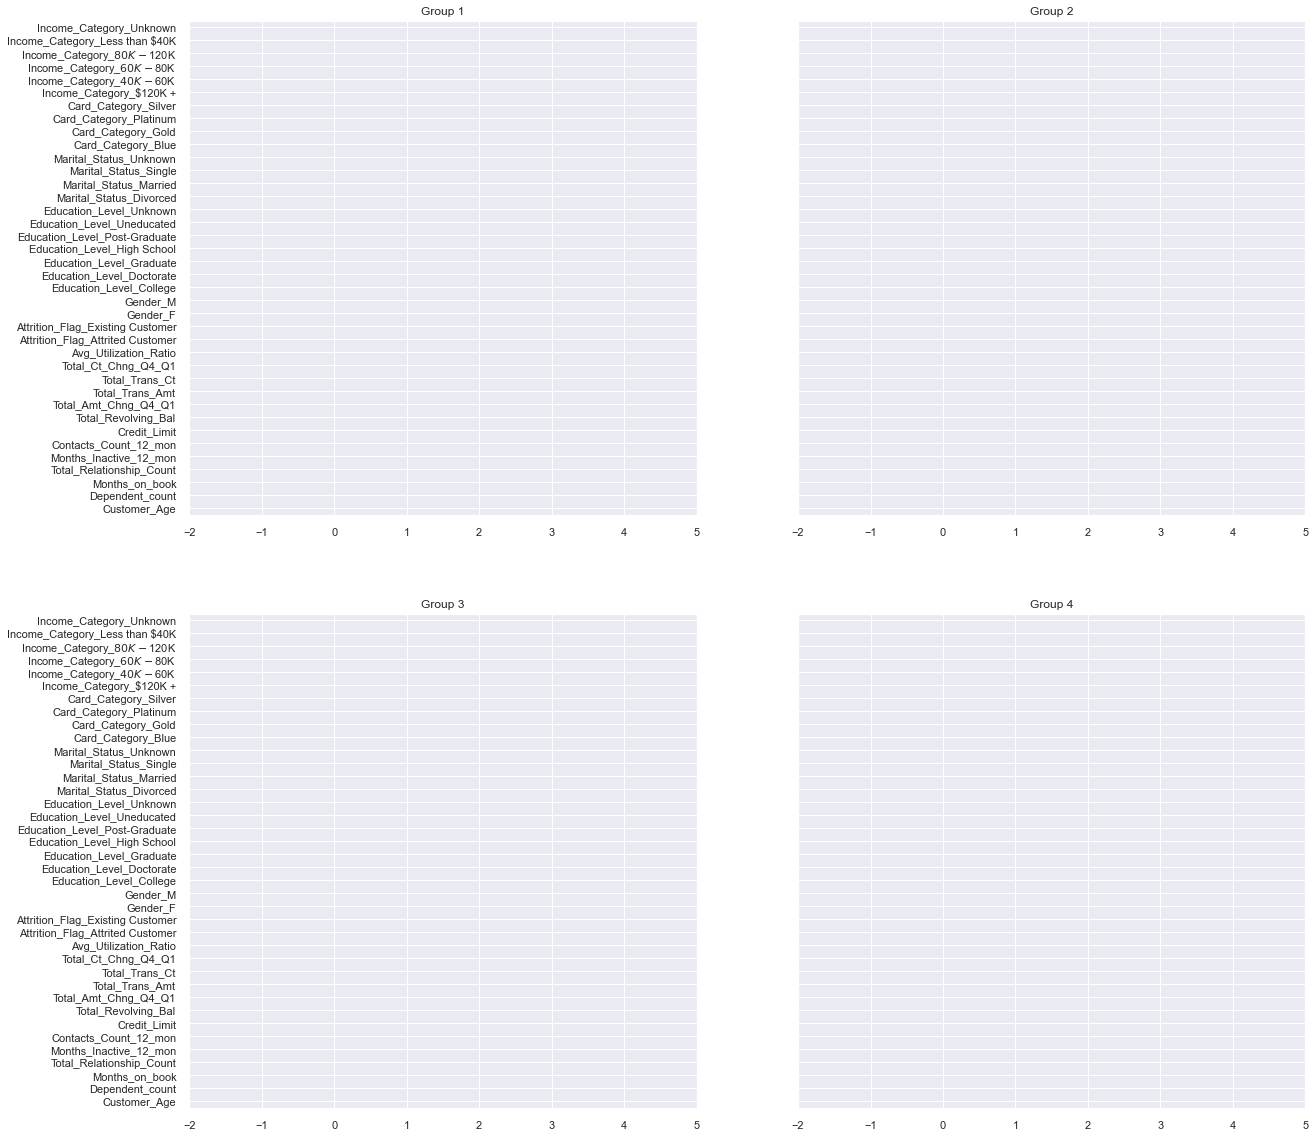

In [162]:
fix, axs = plt.subplots(ncols=2,nrows=2, figsize=(20,32))

df1_escalado_robust[df1_escalado_robust['cluster'] == 0][cols].mean().plot.barh(ax=axs[0,0], xlim=(-2, 5), figsize=(20,20), sharey=True, title='Group 1')
df1_escalado_robust[df1_escalado_robust['cluster'] == 1][cols].mean().plot.barh(ax=axs[0,1], xlim=(-2, 5), figsize=(20,20), sharey=True, title='Group 2')
df1_escalado_robust[df1_escalado_robust['cluster'] == 2][cols].mean().plot.barh(ax=axs[1,0], xlim=(-2, 5), figsize=(20,20), sharey=True, title='Group 3')
df1_escalado_robust[df1_escalado_robust['cluster'] == 3][cols].mean().plot.barh(ax=axs[1,1], xlim=(-2, 5), figsize=(20,20), sharey=True, title='Group 4')


In [159]:
pwd

'C:\\Users\\DIBARRAG\\Desktop\\Udacity'

In [329]:
df.to_excel('C:\\Users\\DIBARRAG\\Desktop\\Udacity/Kmeans.xlsx')

In [160]:
df_PCA_cluster.groupby('CLUSTER').size()

CLUSTER
1    1519
2    3702
3    4215
4     691
dtype: int64

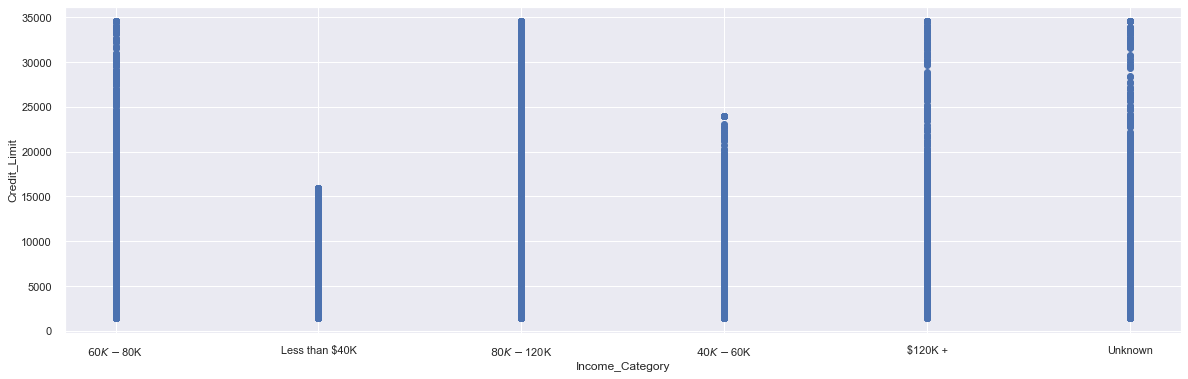

In [218]:

fig, ax = plt.subplots(figsize=(20, 6                          ))

ax.scatter(x = df_PCA_cluster['Income_Category'], y = df['Credit_Limit'],alpha = 1)
ax.set_xlabel("Income_Category")
ax.set_ylabel("Credit_Limit")

#ax[1].scatter(x = df_PCA_cluster['Customer_Age'] , y = df['Credit_Limit'],alpha = 1)
#ax[1].set_xlabel("Education_Level")
#ax[1].set_ylabel("Credit_Limit")

##ax[2].scatter(x = df_PCA_cluster['Education_Level'], y = df['Income_Category'])
##ax[2].set_xlabel("Education_Level")
##ax[2].set_ylabel("Income_Category")


plt.show()

Text(0, 0.5, 'Credit_Limit')

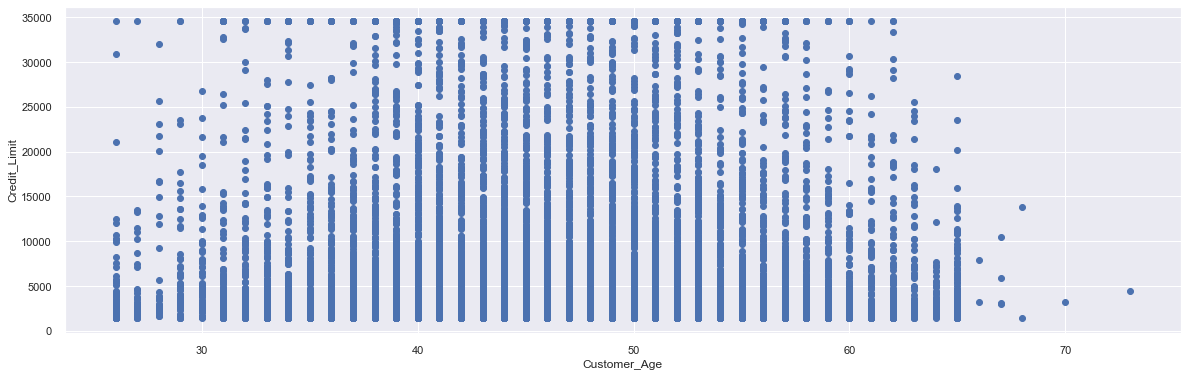

In [219]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(x = df_PCA_cluster['Customer_Age'], y = df['Credit_Limit'],alpha = 1)
ax.set_xlabel("Customer_Age")
ax.set_ylabel("Credit_Limit")

Text(0, 0.5, 'Avg_Utilization_Ratio')

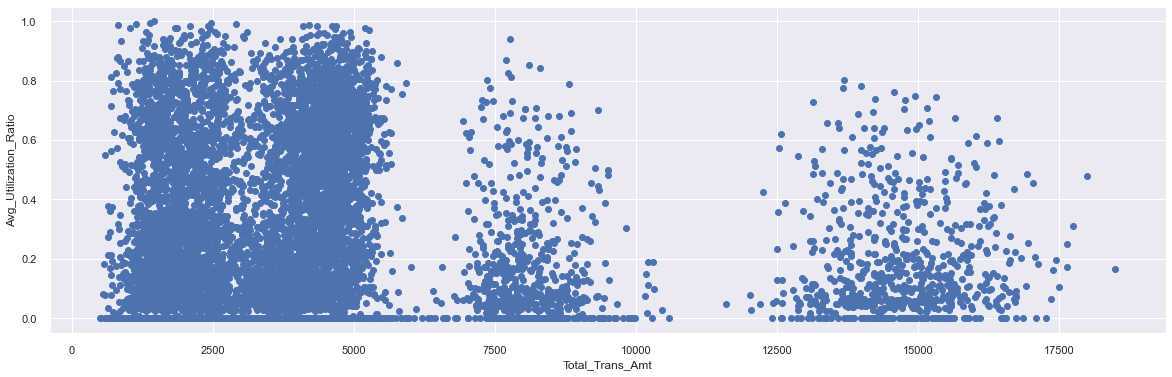

In [223]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(x = df_PCA_cluster['Total_Trans_Amt'], y = df['Avg_Utilization_Ratio'],alpha = 1)
ax.set_xlabel("Total_Trans_Amt")
ax.set_ylabel("Avg_Utilization_Ratio")

Text(0, 0.5, 'Credit_Limit')

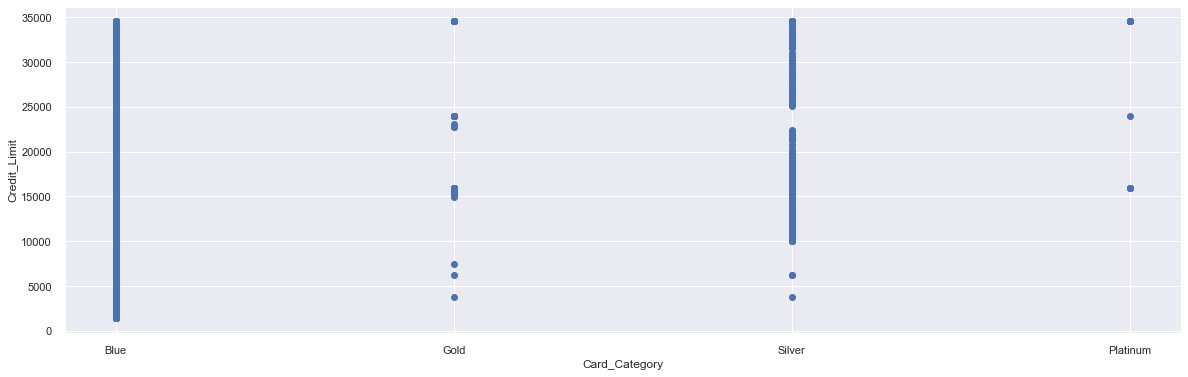

In [224]:
ig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(x = df_PCA_cluster['Card_Category'], y = df['Credit_Limit'],alpha = 1)
ax.set_xlabel("Card_Category")
ax.set_ylabel("Credit_Limit")

[Text(0.5, 1.0, 'Costumer_Age'), Text(0, 0.5, ''), Text(0.5, 0, '')]

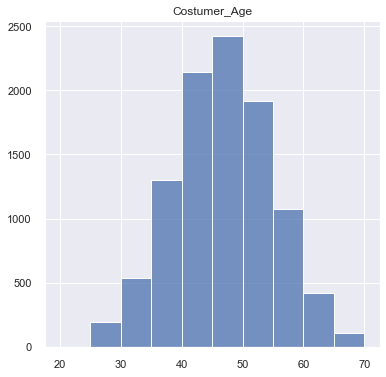

In [236]:
fig, axs = plt.subplots( figsize=(6,6))

sns.histplot(df_PCA_cluster['Customer_Age'],  binrange=(20,70), binwidth=5).set(title='Costumer_Age', ylabel='', xlabel='')

<AxesSubplot:title={'center':'Marial_Status'}>

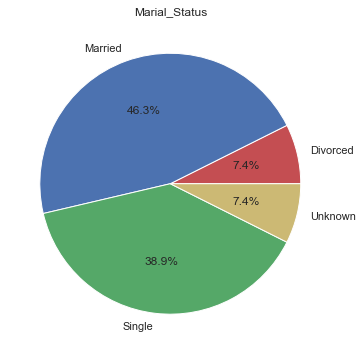

In [246]:
fix, axs = plt.subplots( figsize=(6,6))

df_PCA_cluster['Marital_Status'].value_counts().sort_index().plot(kind='pie', ylabel='', title='Marial_Status', colors=['r','b','g','y'], autopct='%.1f%%')


Text(0, 0.5, 'Avg_Utilization_Ratio')

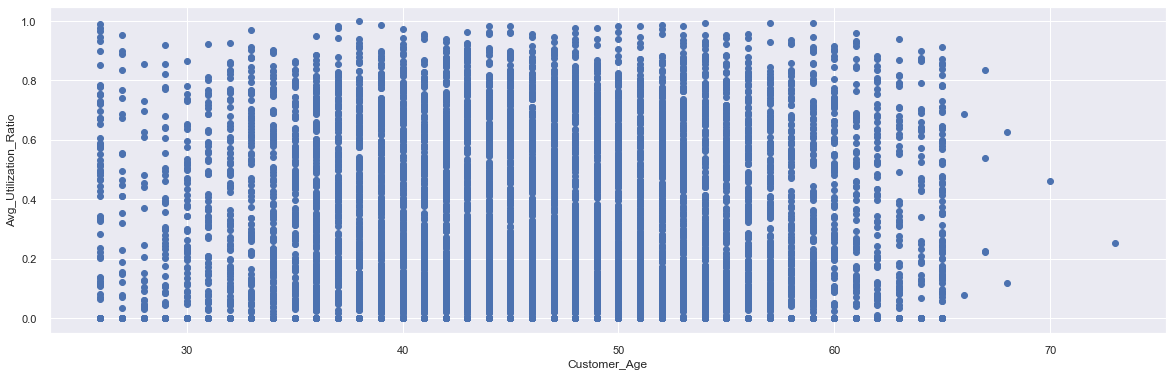

In [247]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(x = df_PCA_cluster['Customer_Age'], y = df['Avg_Utilization_Ratio'],alpha = 1)
ax.set_xlabel("Customer_Age")
ax.set_ylabel("Avg_Utilization_Ratio")

Text(0, 0.5, 'Avg_Open_To_Buy')

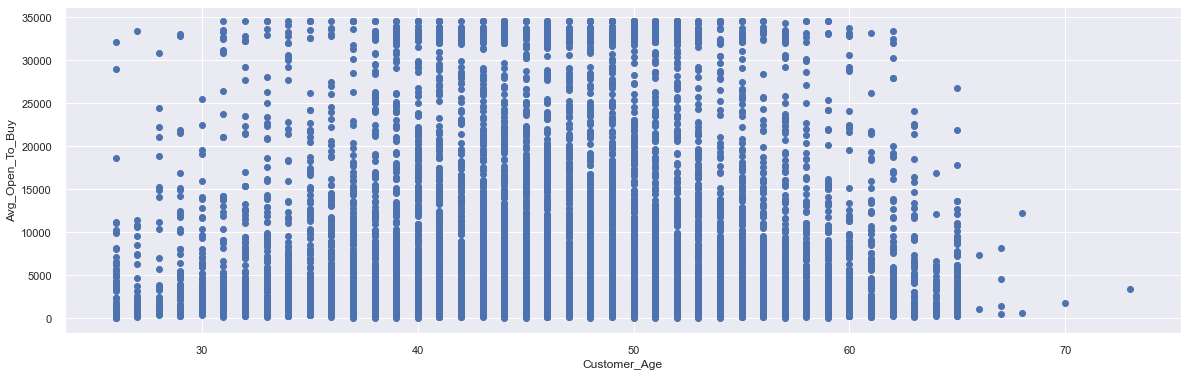

In [250]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.scatter(x = df_PCA_cluster['Customer_Age'], y = df['Avg_Open_To_Buy'],alpha = 1)
ax.set_xlabel("Customer_Age")
ax.set_ylabel("Avg_Open_To_Buy")